<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition

For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,8)

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy import stats
from scipy.stats import probplot

# Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


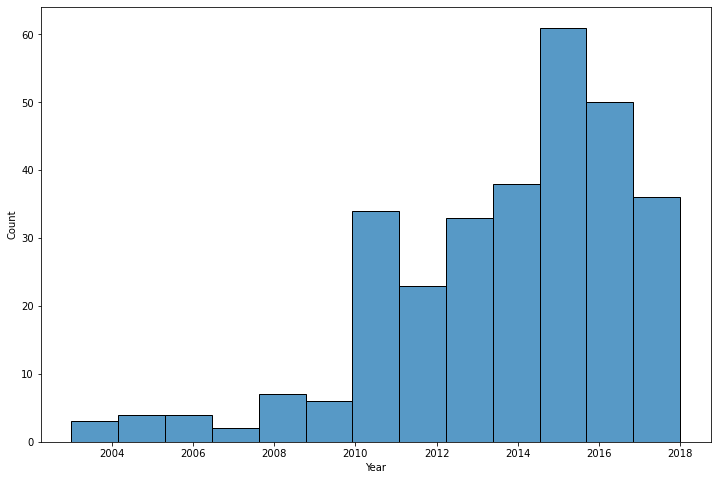

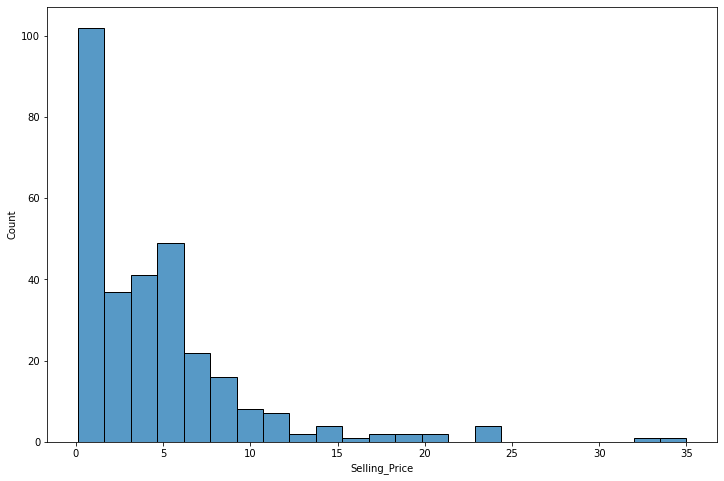

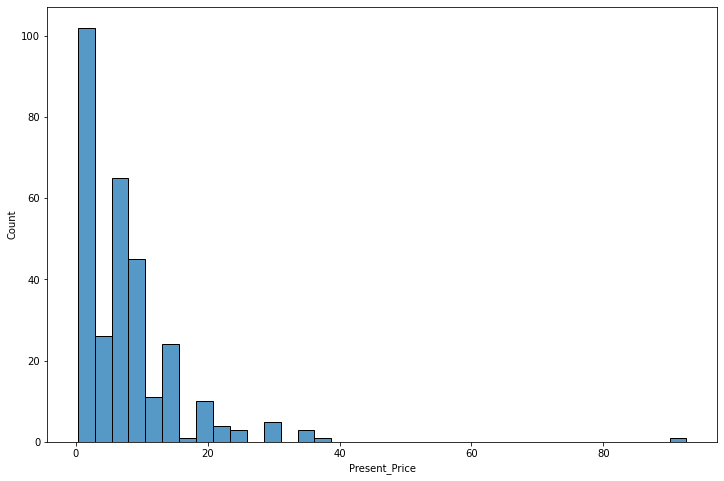

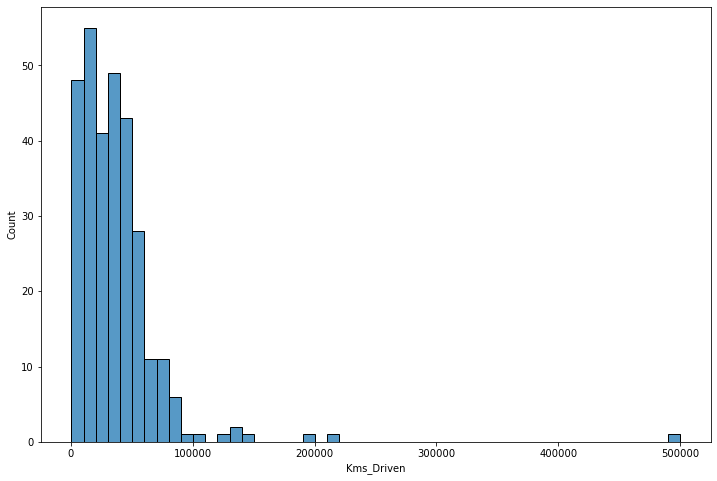

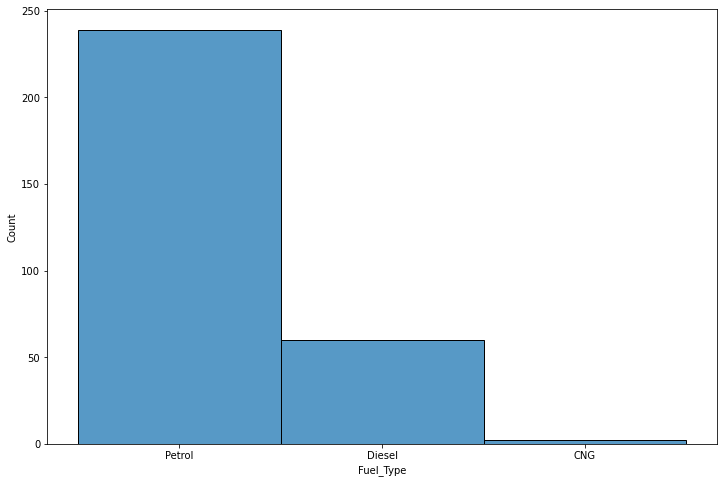

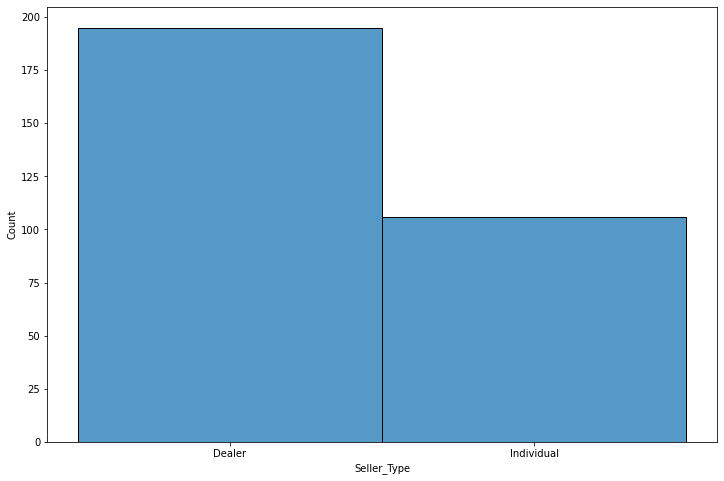

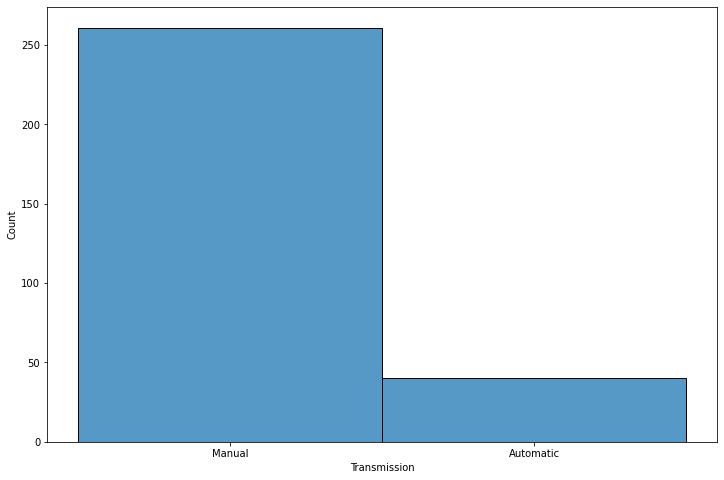

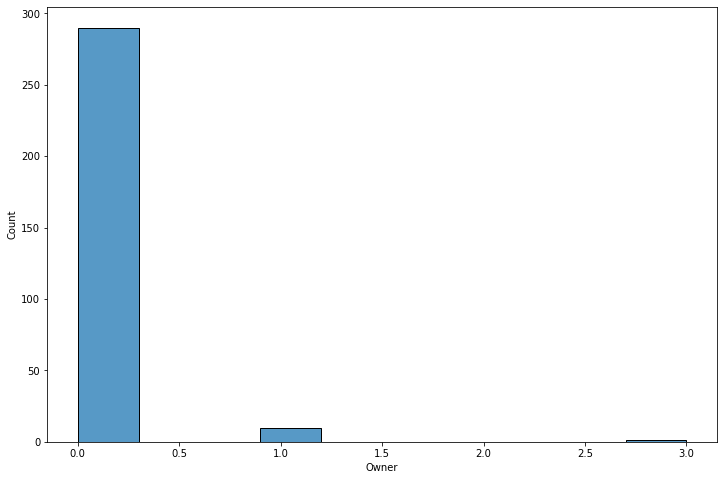

In [10]:
for i,col in enumerate(df.drop("Car_Name", axis=1).columns):
    plt.figure(i)
    sns.histplot(df[col])

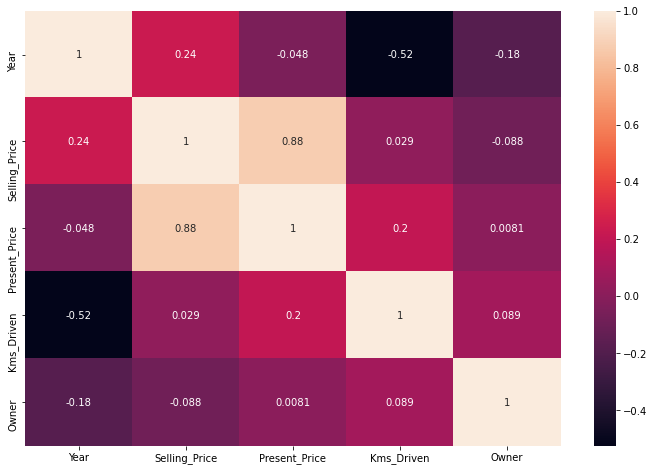

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


**Creating "Age" column and dropping "Year" column**

In [13]:
import datetime
datetime.datetime.now().year

2021

In [14]:
df["Age"] = datetime.datetime.now().year - df.Year

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
df.drop(["Car_Name", "Year"], axis=1, inplace=True)
# df.drop(columns=["Car_Name", "Year"], inplace=True)

In [17]:
# This code does all the steps defined in "Dealing with Fuel_Type", 
# "Dealing with Transmission", and "Dealing with Seller_Type" by itself.

df=pd.get_dummies(df, drop_first=True)
# It helps in reducing the extra column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables.

**Dealing with Fuel_Type**

In [18]:
# pd.get_dummies(df.Fuel_Type)

In [19]:
# pd.DataFrame(pd.get_dummies(df.Fuel_Type))

In [20]:
# df = pd.concat([df, pd.get_dummies(df.Fuel_Type)], axis=1)

In [21]:
# df.drop("Fuel_Type", axis=1, inplace=True)

**Dealing with Transmission**

In [22]:
# df.Transmission.unique()

In [23]:
# df.Transmission = df.Transmission.map(lambda x: 0 if x=="Automatic" else 1)

In [24]:
# df.Transmission.unique()

**Dealing with Seller_Type**

In [25]:
# df.Seller_Type.unique()

In [26]:
# df.Seller_Type = df.Seller_Type.map(lambda x: 0 if x=="Dealer" else 1)

In [27]:
# df.Seller_Type.unique()

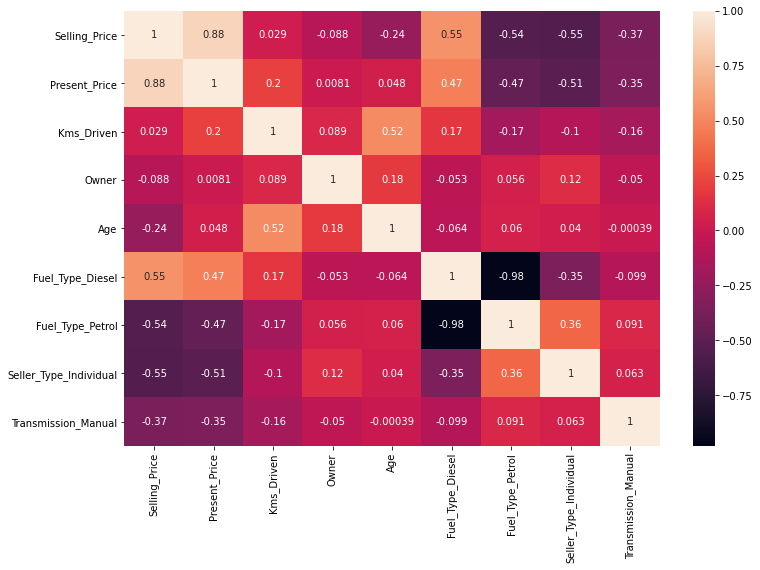

In [28]:
sns.heatmap(data=df.corr(), annot=True);

In [29]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
df.shape

(301, 9)

### Features and target variable

In [31]:
X = df.drop("Selling_Price", axis=True)

In [32]:
y = df.Selling_Price

# Regularization

### Splitting data into training and testing

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


**Feature Scaling**

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

##  Model Building (Linear Regression)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# lm = LinearRegression(normalize=True).fit(X_train,y_train)
# with normalize=True, we can scale our features.

In [40]:
lm = LinearRegression()

In [41]:
# We have just trained the model by fitting!!!!
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
lm.coef_

array([41.08840546, -3.97518007, -2.44073273, -4.78571647,  2.61924627,
        0.60648687, -1.22016745, -1.00868282])

In [43]:
y_pred = lm.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [45]:
y_train_pred = lm.predict(X_train)

In [46]:
eval_metrics(y_train, y_train_pred)

# We may have overfitting here! Since, it is kinda momental screen shot, we need to confirm it with CV.

Model testing performance:
--------------------------
R2_score 	: 0.879844039130107
MAE 		: 1.137457593394413
MSE 		: 3.056095425123057
RMSE 		: 1.7481691637604917


In [47]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8589039971923134
MAE 		: 1.1811769157076817
MSE 		: 3.7871262249675848
RMSE 		: 1.9460540138874833


In [48]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.748169,1.946054
mae,1.137458,1.181177
mse,3.056095,3.787126
R2,0.879844,0.858904


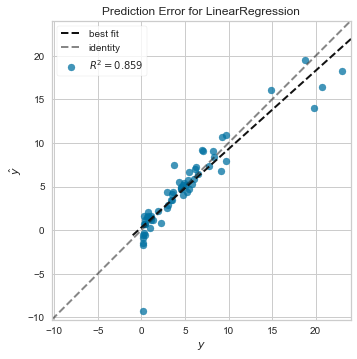

In [49]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm_1 = LinearRegression(normalize=True)
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [50]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, "residul":y_test - y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted,residul
67,9.25,10.707296,-1.457296
99,9.65,10.875207,-1.225207
266,3.65,4.430969,-0.780969
222,6.00,5.913378,0.086622
24,2.90,2.549419,0.350581
282,8.25,9.036746,-0.786746
279,6.25,7.273781,-1.023781
138,0.60,1.493600,-0.893600
50,14.90,16.022866,-1.122866
234,5.50,4.741886,0.758114


# Multicollineraity

In [51]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [52]:
pd.DataFrame(X).corr().style.applymap(color_red)

# It is seen that we do not have some multicollineraity.

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Present_Price,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


**Let's apply CROSS VALIDATE**

In [53]:
# from sklearn.metrics import SCORERS
# list(SCORERS.keys())

In [54]:
from sklearn.model_selection import cross_validate, cross_val_score

In [55]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [56]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001999,0.001998,0.769094,-1.204380,-2.666563,-1.632961
2,0.000999,0.009995,0.830450,-0.985817,-1.853752,-1.361526
3,0.001999,0.001999,0.931165,-0.971937,-2.247659,-1.499219
4,0.001999,0.001998,0.789661,-1.082373,-2.614008,-1.616789
5,0.001999,0.002000,0.940047,-0.938976,-2.020757,-1.421533
6,0.001998,0.002000,0.828540,-1.238033,-2.479987,-1.574797
7,0.001998,0.002000,0.834102,-1.564159,-9.818400,-3.133433
8,0.002999,0.002997,0.443491,-1.383927,-4.684201,-2.164302
9,0.001998,0.002000,0.670128,-1.229297,-4.021533,-2.005376
10,0.001999,0.002997,0.680031,-1.776592,-15.869029,-3.983595


In [57]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.771671
test_neg_mean_absolute_error       -1.237549
test_neg_mean_squared_error        -4.827589
test_neg_root_mean_squared_error   -2.039353
dtype: float64

In [58]:
# eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8589039971923134
MAE 		: 1.1811769157076817
MSE 		: 3.7871262249675848
RMSE 		: 1.9460540138874833


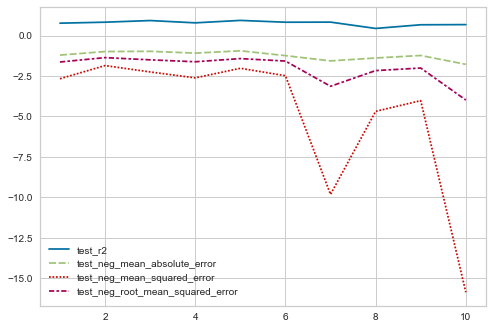

In [59]:
sns.lineplot(data = scores.iloc[:,2:]);

In [60]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,41.088405
1,-3.975180
2,-2.440733
3,-4.785716
4,2.619246
5,0.606487
6,-1.220167
7,-1.008683


# Interpret the model

# Model Evaluation

In [61]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
67,9.25,10.707296,-1.457296
99,9.65,10.875207,-1.225207
266,3.65,4.430969,-0.780969
222,6.00,5.913378,0.086622
24,2.90,2.549419,0.350581
282,8.25,9.036746,-0.786746
279,6.25,7.273781,-1.023781
138,0.60,1.493600,-0.893600
50,14.90,16.022866,-1.122866
234,5.50,4.741886,0.758114


# Ridge

In [98]:
from sklearn.linear_model import Ridge, RidgeCV

In [63]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [64]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [65]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [66]:
ridge_cv_model.alpha_

0.21000000000000002

In [67]:
y_pred = ridge_cv_model.predict(X_test)

In [68]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.876774110944526
MAE 		: 1.1383013489225144
MSE 		: 3.3074785022294644
RMSE 		: 1.8186474375836192


In [69]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.8725358849939033
MAE 		: 1.1915048765012448
MSE 		: 3.2419739804610646
RMSE 		: 1.8005482444136465


In [70]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.800548,1.818647
mae,1.191505,1.138301
mse,3.241974,3.307479
R2,0.872536,0.876774


In [71]:
pd.concat([ls, rcs], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test
rmse,1.748169,1.946054,1.800548,1.818647
mae,1.137458,1.181177,1.191505,1.138301
mse,3.056095,3.787126,3.241974,3.307479
R2,0.879844,0.858904,0.872536,0.876774


# Lasso

In [72]:
from sklearn.linear_model import Lasso, LassoCV

In [73]:
alpha_space = np.linspace(0.001, 1, 100)

In [74]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [75]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0....
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
        cv=10, max_iter=100000)

In [76]:
lasso_cv_model.alpha_

0.03127272727272727

In [77]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8685460934767105
MAE 		: 1.19658480770505
MSE 		: 3.3434519555412265
RMSE 		: 1.8285108573758118


In [78]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8911678280935197
MAE 		: 1.095809645013982
MSE 		: 2.9211399624763725
RMSE 		: 1.7091342728049113


In [79]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.828511,1.709134
mae,1.196585,1.095810
mse,3.343452,2.921140
R2,0.868546,0.891168


In [80]:
pd.concat([ls, rcs, lcs], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
rmse,1.748169,1.946054,1.800548,1.818647,1.828511,1.709134
mae,1.137458,1.181177,1.191505,1.138301,1.196585,1.095810
mse,3.056095,3.787126,3.241974,3.307479,3.343452,2.921140
R2,0.879844,0.858904,0.872536,0.876774,0.868546,0.891168


## Elastic-Net 

In [81]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [82]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [83]:
elastic_model.l1_ratio

0.5

In [84]:
elastic_model.alpha

1.0

In [85]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.18365441423272466
MAE 		: 2.9737637659724547
MSE 		: 20.76326460977011
RMSE 		: 4.556672537035124


In [86]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.1915448500897866
MAE 		: 3.054714362337027
MSE 		: 21.699563694289655
RMSE 		: 4.658279048563928


In [87]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,4.556673,4.658279
mae,2.973764,3.054714
mse,20.763265,21.699564
R2,0.183654,0.191545


In [88]:
pd.concat([ls, rcs, lcs, es], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.748169,1.946054,1.800548,1.818647,1.828511,1.709134,4.556673,4.658279
mae,1.137458,1.181177,1.191505,1.138301,1.196585,1.095810,2.973764,3.054714
mse,3.056095,3.787126,3.241974,3.307479,3.343452,2.921140,20.763265,21.699564
R2,0.879844,0.858904,0.872536,0.876774,0.868546,0.891168,0.183654,0.191545


In [89]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [90]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.303727...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [91]:
elastic_cv_model.alpha_

0.011090909090909092

In [92]:
elastic_cv_model.l1_ratio_

0.95

In [93]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8719204052869122
MAE 		: 1.1881973767342613
MSE 		: 3.257628340870439
RMSE 		: 1.8048901187802096


In [94]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8835073852868379
MAE 		: 1.1036297329306
MSE 		: 3.1267521929489175
RMSE 		: 1.7682624785220427


In [95]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.804890,1.768262
mae,1.188197,1.103630
mse,3.257628,3.126752
R2,0.871920,0.883507


In [96]:
pd.concat([ls, rcs, lcs, ecs], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
rmse,1.748169,1.946054,1.800548,1.818647,1.828511,1.709134,1.804890,1.768262
mae,1.137458,1.181177,1.191505,1.138301,1.196585,1.095810,1.188197,1.103630
mse,3.056095,3.787126,3.241974,3.307479,3.343452,2.921140,3.257628,3.126752
R2,0.879844,0.858904,0.872536,0.876774,0.868546,0.891168,0.871920,0.883507


# Salih Hoca'nın Özet Kodları 

In [99]:
X = df.drop(columns="Selling_Price")
y = df["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rmse_vals =[]
r2_train = []
r2_vals =[]
model_names =[]

lr = LinearRegression()
rr = Ridge()
rrCv = RidgeCV(alphas=np.linspace(0.001, 1,100),scoring="neg_root_mean_squared_error",cv=10)
elastic = ElasticNet()
ElasticNetCv = ElasticNetCV(alphas=np.linspace(0.01,1,100), l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1],max_iter=100000,cv=10)
lassor = Lasso()
lassoCv = LassoCV(alphas = np.linspace(0.001,1,100), cv = 10, max_iter = 100000)

models = [lr,rr,rrCv,lassor,lassoCv,elastic,ElasticNetCv]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_vals.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_train.append (model.score(X_train,y_train))
    r2_vals.append(r2_score(y_test, y_pred))

model_names = ['LinearRegression','Ridge','RidgeCv','Lasso','LassoCv','ElasticNet','ElasticNetCv']
result_df = pd.DataFrame({'RMSE':rmse_vals,'R2 Train':r2_train, 'R2 Test':r2_vals}, index=model_names)
cm = sns.light_palette((230, 75, 69),as_cmap=True , input="husl")
result_df.style.background_gradient(cmap=cm).highlight_min(axis=0, color='red').highlight_max(axis=0,color="lightgreen")

,RMSE,R2 Train,R2 Test
LinearRegression,1.881953,0.882803,0.875616
Ridge,1.877167,0.882465,0.876247
RidgeCv,1.877167,0.882465,0.876247
Lasso,2.136973,0.835666,0.839621
LassoCv,1.880992,0.882784,0.875743
ElasticNet,2.093872,0.839360,0.846026
ElasticNetCv,1.874872,0.882125,0.876550
